# Data Preprocessing - Elanor

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Activity

In [2]:
# load in data
activity_path = "CSCI413Project/combined data/Activity Data.csv"
activity_df = pd.read_csv(activity_path, parse_dates=["activity_ts"], dayfirst=True)
activity_df.head()

,activity_ts,activity_type,active_Kcal,step_count,distance_m,duration_s,active_time_s,start_time_s,start_time_offset_s,met,intensity,motion_intensity_mean,motion_intensity_max,subjectID
0,2023-10-01 05:45:00,SEDENTARY,0,0,0.0,900,900,1696135500,3600,1.0,SEDENTARY,0.0,2.0,2301
1,2023-10-01 06:00:00,SEDENTARY,0,0,0.0,900,900,1696136400,3600,1.0,SEDENTARY,0.0,1.0,2301
2,2023-10-01 06:15:00,SEDENTARY,0,0,0.0,900,900,1696137300,3600,1.0,SEDENTARY,0.0,3.0,2301
3,2023-10-01 06:30:00,SEDENTARY,0,0,0.0,900,900,1696138200,3600,1.0,SEDENTARY,0.0,4.0,2301
4,2023-10-01 06:45:00,SEDENTARY,0,0,0.0,900,900,1696139100,3600,1.0,SEDENTARY,0.0,3.0,2301


In [3]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228681 entries, 0 to 228680
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   activity_ts            228681 non-null  datetime64[ns]
 1   activity_type          228681 non-null  object        
 2   active_Kcal            228681 non-null  int64         
 3   step_count             228681 non-null  int64         
 4   distance_m             228681 non-null  float64       
 5   duration_s             228681 non-null  int64         
 6   active_time_s          228681 non-null  int64         
 7   start_time_s           228681 non-null  int64         
 8   start_time_offset_s    228681 non-null  int64         
 9   met                    228681 non-null  float64       
 10  intensity              228681 non-null  object        
 11  motion_intensity_mean  228681 non-null  float64       
 12  motion_intensity_max   228681 non-null  floa

In [4]:
# separate columns into numeric, nominal, and ordinal
numericCols = ["active_Kcal", "step_count", "distance_m", "duration_s", "active_time_s", "start_time_s",
               "start_time_offset_s", "met", "motion_intensity_mean", "motion_intensity_max"] #, "subjectID"]
nominalCols = ["activity_type", "intensity"]
ordinalCols = ["activity_ts", "subjectID"]  # maybe

In [5]:
# check for null values
activity_df.isnull().any()

activity_ts              False
activity_type            False
active_Kcal              False
step_count               False
distance_m               False
duration_s               False
active_time_s            False
start_time_s             False
start_time_offset_s      False
met                      False
intensity                False
motion_intensity_mean    False
motion_intensity_max     False
subjectID                False
dtype: bool

In [6]:
# define function to calculate and display summary statistics for a numeric column
def display_stats(df, col):
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    stdDev = df[col].std()
    maximum = df[col].max()
    minimum = df[col].min()

    print(f"Stats for {col}: \nMean: {mean} \nMedian: {median} \nMode: {mode} \nStandard Deviation: {stdDev} \nMax: {maximum} \nMin: {minimum}")

In [7]:
# call stats function on each numeric column
for col in numericCols:
    display_stats(activity_df, col)
    print("\n")

Stats for active_Kcal: 
Mean: 4.357624813604978 
Median: 0.0 
Mode: 0    0
Name: active_Kcal, dtype: int64 
Standard Deviation: 12.40674444450741 
Max: 235 
Min: 0


Stats for step_count: 
Mean: 55.84334072354065 
Median: 0.0 
Mode: 0    0
Name: step_count, dtype: int64 
Standard Deviation: 196.3208925432034 
Max: 2957 
Min: 0


Stats for distance_m: 
Mean: 50.09889011330193 
Median: 0.0 
Mode: 0    0.0
Name: distance_m, dtype: float64 
Standard Deviation: 174.51073312748414 
Max: 9777.25 
Min: 0.0


Stats for duration_s: 
Mean: 906.2636598580556 
Median: 900.0 
Mode: 0    900
Name: duration_s, dtype: int64 
Standard Deviation: 398.18271184169555 
Max: 57600 
Min: 60


Stats for active_time_s: 
Mean: 595.9444991057412 
Median: 780.0 
Mode: 0    900
Name: active_time_s, dtype: int64 
Standard Deviation: 460.60439965989576 
Max: 57600 
Min: 0


Stats for start_time_s: 
Mean: 1705413501.200362 
Median: 1703581200.0 
Mode: 0    1699702200
1    1699955100
2    1699988400
3    1700038800
4  

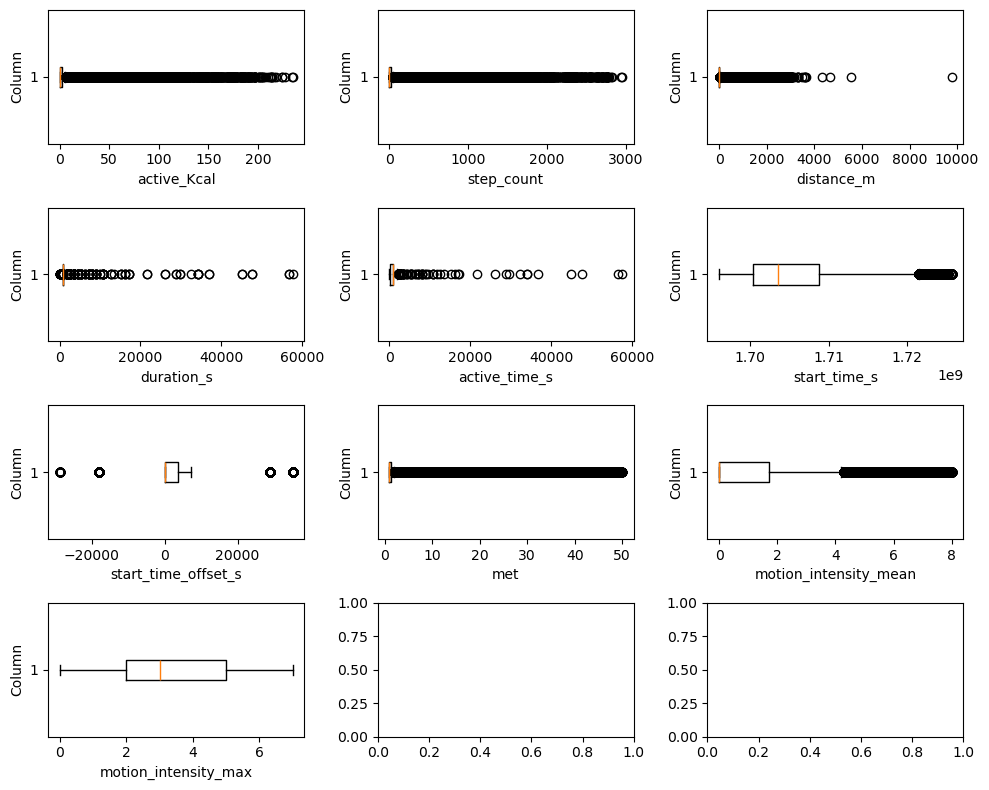

In [8]:
# box plot for each numeric column
fig, axs = plt.subplots(4, 3, figsize=(10, 8))

for i in range(len(numericCols)):
    col = numericCols[i]
    axs[i//3, i%3].boxplot(activity_df[col], vert=False);
    axs[i//3, i%3].set_xlabel(col)
    axs[i//3, i%3].set_ylabel("Column")
    
plt.tight_layout()
plt.show()

In [9]:
# look at distance outliers
outliers = activity_df[ activity_df["distance_m"] > 4000 ]
print(outliers)

               activity_ts activity_type  active_Kcal  step_count  distance_m  \
106032 2024-01-03 15:45:00       WALKING           25         890     9777.25   
113676 2024-02-15 19:00:00       WALKING            4         139     4640.25   
158117 2023-11-08 19:30:00       WALKING           12         146     5524.10   
170123 2024-01-30 18:00:00       WALKING            2         158     4335.84   

        duration_s  active_time_s  start_time_s  start_time_offset_s  \
106032         900            780    1704296700                    0   
113676         900            120    1708023600                    0   
158117         900            240    1699471800                    0   
170123         900            150    1706637600                    0   

             met intensity  motion_intensity_mean  motion_intensity_max  \
106032  2.837578    ACTIVE                    2.0                   2.0   
113676  2.566069    ACTIVE                    2.0                   2.0   
158117  

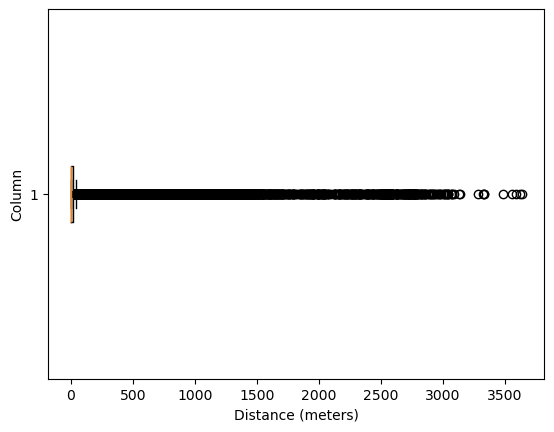

In [10]:
# remove them and show boxplot again
activity_df.drop(activity_df[ activity_df["distance_m"] > 4000 ].index, inplace=True)

plt.boxplot(activity_df["distance_m"], vert=False);
plt.xlabel("Distance (meters)")
plt.ylabel("Column")
plt.show()

In [11]:
# look at duration/active time outliers
# measurements are taken in 15 min intervals, so duration should never be greater than 900 seconds
print(activity_df[ activity_df["duration_s"] > 900 ])

               activity_ts activity_type  active_Kcal  step_count  distance_m  \
13504  2023-10-24 15:45:00       GENERIC            2           0        0.00   
13505  2023-10-24 15:45:00     SEDENTARY            5           0        0.02   
14389  2023-10-31 10:30:00     SEDENTARY            0           0        0.00   
15556  2023-11-08 17:30:00     SEDENTARY            0           0        0.00   
15689  2023-11-09 20:30:00       RUNNING            1          39       45.56   
...                    ...           ...          ...         ...         ...   
210960 2024-05-02 16:00:00     SEDENTARY            0           0        0.00   
221455 2024-07-13 09:15:00       WALKING            1          33       27.78   
221456 2024-07-13 09:15:00     SEDENTARY            0           0        0.00   
228551 2024-08-31 12:15:00       WALKING           20         205      172.55   
228552 2024-08-31 12:15:00     SEDENTARY            0           0        0.00   

        duration_s  active_

In [12]:
# remove time outliers
activity_df.drop(activity_df[ activity_df["duration_s"] > 900 ].index, inplace=True)

In [13]:
# make sure our categorical columns are okay
print(activity_df["activity_type"].unique())
print(activity_df["intensity"].unique())

['SEDENTARY' 'WALKING' 'RUNNING' 'GENERIC' 'UNMONITORED'
 'WHEELCHAIR_PUSHING']
['SEDENTARY' 'ACTIVE' 'HIGHLY_ACTIVE']


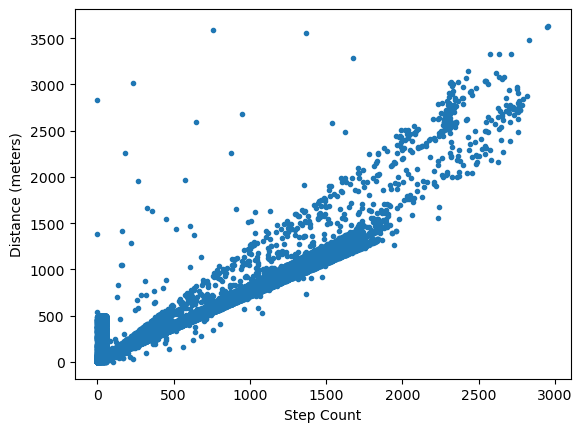

In [14]:
# plot distance vs step count
plt.plot(activity_df["step_count"], activity_df["distance_m"], '.')
plt.xlabel("Step Count")
plt.ylabel("Distance (meters)")
plt.show()

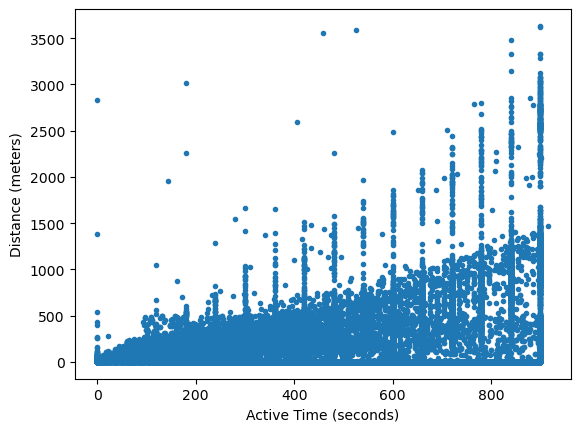

In [15]:
# plot distance vs active time
plt.plot(activity_df["active_time_s"], activity_df["distance_m"], '.')
plt.xlabel("Active Time (seconds)")
plt.ylabel("Distance (meters)")
plt.show()

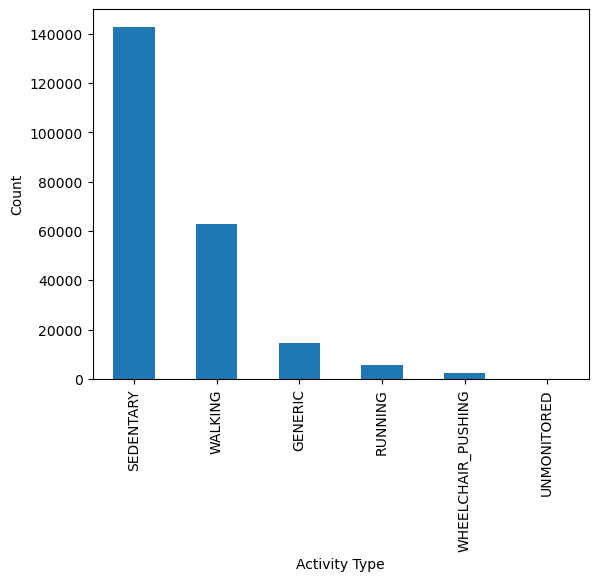

In [16]:
# count plot for activity type
counts = activity_df["activity_type"].value_counts().plot(kind="bar")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.show()

In [17]:
# one hot encode categorical variables
activity_transformed = pd.get_dummies(activity_df, columns=nominalCols)
activity_transformed.head()

,activity_ts,active_Kcal,step_count,distance_m,duration_s,active_time_s,start_time_s,start_time_offset_s,met,motion_intensity_mean,...,subjectID,activity_type_GENERIC,activity_type_RUNNING,activity_type_SEDENTARY,activity_type_UNMONITORED,activity_type_WALKING,activity_type_WHEELCHAIR_PUSHING,intensity_ACTIVE,intensity_HIGHLY_ACTIVE,intensity_SEDENTARY
0,2023-10-01 05:45:00,0,0,0.0,900,900,1696135500,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
1,2023-10-01 06:00:00,0,0,0.0,900,900,1696136400,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
2,2023-10-01 06:15:00,0,0,0.0,900,900,1696137300,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
3,2023-10-01 06:30:00,0,0,0.0,900,900,1696138200,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
4,2023-10-01 06:45:00,0,0,0.0,900,900,1696139100,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True


In [18]:
# standardize numeric columns
scalerStd = StandardScaler()
activity_transformed[numericCols] = scalerStd.fit_transform(activity_transformed[numericCols])

activity_transformed = pd.DataFrame(activity_transformed) #, columns=numericCols)

activity_transformed.head()

,activity_ts,active_Kcal,step_count,distance_m,duration_s,active_time_s,start_time_s,start_time_offset_s,met,motion_intensity_mean,...,subjectID,activity_type_GENERIC,activity_type_RUNNING,activity_type_SEDENTARY,activity_type_UNMONITORED,activity_type_WALKING,activity_type_WHEELCHAIR_PUSHING,intensity_ACTIVE,intensity_HIGHLY_ACTIVE,intensity_SEDENTARY
0,2023-10-01 05:45:00,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421469,0.297033,-0.237991,-0.565356,...,2301,False,False,True,False,False,False,False,False,True
1,2023-10-01 06:00:00,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421331,0.297033,-0.237991,-0.565356,...,2301,False,False,True,False,False,False,False,False,True
2,2023-10-01 06:15:00,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421193,0.297033,-0.237991,-0.565356,...,2301,False,False,True,False,False,False,False,False,True
3,2023-10-01 06:30:00,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421056,0.297033,-0.237991,-0.565356,...,2301,False,False,True,False,False,False,False,False,True
4,2023-10-01 06:45:00,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.420918,0.297033,-0.237991,-0.565356,...,2301,False,False,True,False,False,False,False,False,True


# Nutrition

In [19]:
# load in data
nutrition_path = "CSCI413Project/combined data/Nutrition Data.csv"
nutrition_df = pd.read_csv(nutrition_path, parse_dates=["meal_ts"], dayfirst=True)
nutrition_df.head()

,meal_ts,meal_type,meal_tag,carbs_g,prot_g,fat_g,fibre_g,subjectID
0,22/10/2023 10:00,Breakfast,Coffee,0.0,0.0,1.0,0.0,2301
1,22/10/2023 12:00,Lunch,Huel+Peanutbutter,19.0,50.0,32.0,10.0,2301
2,22/10/2023 17:15,Dinner,NaN,10.0,NaN,NaN,NaN,2301
3,23/10/2023 00:00,Breakfast,Coffee,0.0,0.0,1.0,0.0,2301
4,23/10/2023 14:49,Lunch,SweetPotMac+Cheese,54.0,22.0,30.0,NaN,2301


In [20]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   meal_ts    4351 non-null   object 
 1   meal_type  4104 non-null   object 
 2   meal_tag   4290 non-null   object 
 3   carbs_g    4309 non-null   float64
 4   prot_g     4106 non-null   float64
 5   fat_g      4106 non-null   float64
 6   fibre_g    3901 non-null   float64
 7   subjectID  4351 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 272.1+ KB


In [21]:
# separate columns into numeric, nominal, and ordinal
numericCols = ["carbs_g", "prot_g", "fat_g", "fibre_g", "subjectID"]
nominalCols = ["meal_type", "meal_tag"]
ordinalCols = ["meal_ts"]  # maybe

In [22]:
# check for null values
nutrition_df.isnull().any()

meal_ts      False
meal_type     True
meal_tag      True
carbs_g       True
prot_g        True
fat_g         True
fibre_g       True
subjectID    False
dtype: bool

In [23]:
# remove rows without carbs (carbs are most relevant to blood sugar)
nutrition_df.dropna(subset=["carbs_g"], inplace=True)

# remove fiber because it has a lot of nulls and we don't care
# remove meal tag because that's ultimately not gonna be super helpful and is gonna suck to deal with
nutrition_df.drop(["fibre_g", "meal_tag"], axis=1, inplace=True)

nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4309 entries, 0 to 4350
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   meal_ts    4309 non-null   object 
 1   meal_type  4065 non-null   object 
 2   carbs_g    4309 non-null   float64
 3   prot_g     4104 non-null   float64
 4   fat_g      4104 non-null   float64
 5   subjectID  4309 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 235.6+ KB


In [24]:
nutrition_df["meal_type"].unique()

array(['Breakfast', 'Lunch', 'Dinner', 'Snack', 'Not reported', 'Brunch',
       'Correction', 'Snacks', nan, 'Dessert', 'Supper', 'dinner',
       'Drinks', 'Pudding', 'Medication'], dtype=object)

In [25]:
# clean meal type
other = ["Brunch", "Correction", "Dessert", "Drinks", "Pudding", "Medication"]

nutrition_df["meal_type"].replace({np.nan : "Not reported", "dinner" : "Dinner", "Supper" : "Dinner", "Snacks" : "Snack"},
                                  inplace=True)
for val in other:
    nutrition_df["meal_type"].replace(val, "Other", inplace=True)
    
nutrition_df["meal_type"].unique()

array(['Breakfast', 'Lunch', 'Dinner', 'Snack', 'Not reported', 'Other'],
      dtype=object)

In [26]:
# fill protein and fat null values with the median by meal type
protein_medians = nutrition_df.groupby("meal_type")["prot_g"].median()
protein_medians

meal_type
Breakfast       11.0
Dinner          30.0
Lunch           24.0
Not reported     8.0
Other            5.0
Snack            2.0
Name: prot_g, dtype: float64

In [27]:
for meal in protein_medians.keys():
    subset = nutrition_df[nutrition_df["meal_type"] == meal]
    nutrition_df.update(subset.fillna({"prot_g": protein_medians[meal]}))

In [28]:
fat_medians = nutrition_df.groupby("meal_type")["fat_g"].median()
fat_medians

meal_type
Breakfast        8.0
Dinner          25.0
Lunch           21.0
Not reported    14.8
Other            4.0
Snack            5.0
Name: fat_g, dtype: float64

In [29]:
for meal in fat_medians.keys():
    subset = nutrition_df[nutrition_df["meal_type"] == meal]
    nutrition_df.update(subset.fillna({"fat_g": fat_medians[meal]}))
    
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4309 entries, 0 to 4350
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   meal_ts    4309 non-null   object 
 1   meal_type  4309 non-null   object 
 2   carbs_g    4309 non-null   float64
 3   prot_g     4309 non-null   float64
 4   fat_g      4309 non-null   float64
 5   subjectID  4309 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 235.6+ KB


In [30]:
# columns
numericCols = ["carbs_g", "prot_g", "fat_g"]
nominalCols = ["meal_type"]
ordinalCols = ["meal_ts", "subjectID"]

In [31]:
# call stats function on each numeric column
for col in numericCols:
    display_stats(nutrition_df, col)
    print("\n")

Stats for carbs_g: 
Mean: 44.89001160362033 
Median: 39.0 
Mode: 0    30.0
Name: carbs_g, dtype: float64 
Standard Deviation: 35.49004582708503 
Max: 283.2 
Min: 0.0


Stats for prot_g: 
Mean: 17.857171037363656 
Median: 13.0 
Mode: 0    2.0
Name: prot_g, dtype: float64 
Standard Deviation: 17.243569414965744 
Max: 146.0 
Min: 0.0


Stats for fat_g: 
Mean: 18.1425458343003 
Median: 13.8 
Mode: 0    0.0
Name: fat_g, dtype: float64 
Standard Deviation: 18.02584391844665 
Max: 193.0 
Min: 0.0




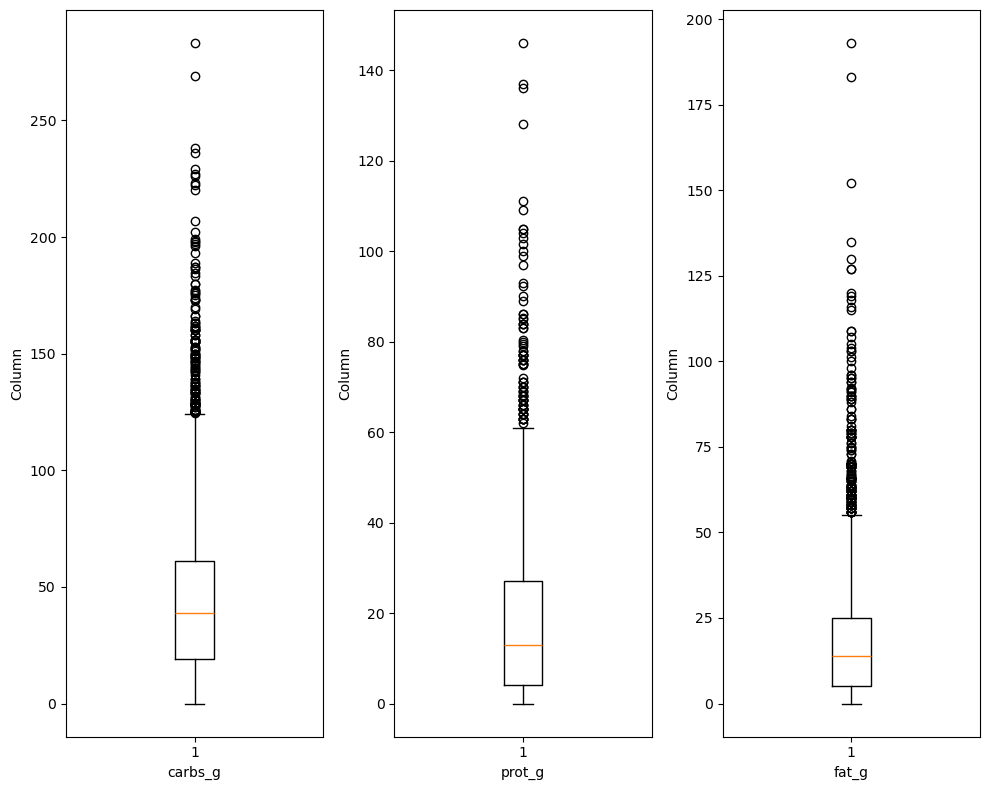

In [32]:
# box plot for each numeric column
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

for i in range(len(numericCols)):
    col = numericCols[i]
    axs[i%3].boxplot(nutrition_df[col]);
    axs[i%3].set_xlabel(col)
    axs[i%3].set_ylabel("Column")
    
plt.tight_layout()
plt.show()

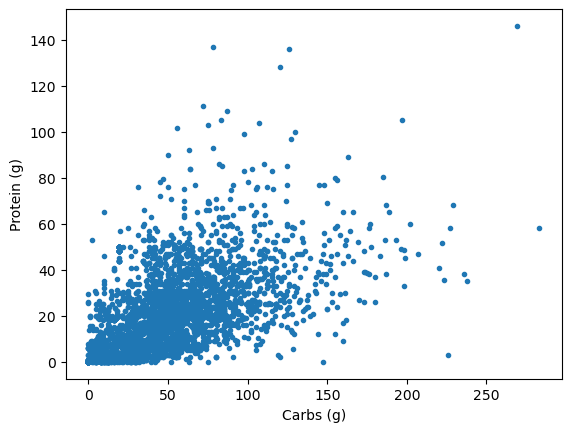

In [33]:
# plot carbs vs protein
plt.plot(nutrition_df["carbs_g"], nutrition_df["prot_g"], '.')
plt.xlabel("Carbs (g)")
plt.ylabel("Protein (g)")
plt.show()

In [34]:
# median carbs by meal type
nutrition_df.groupby("meal_type")["carbs_g"].median()

meal_type
Breakfast       30.00
Dinner          67.00
Lunch           50.00
Not reported    32.70
Other           28.05
Snack           16.00
Name: carbs_g, dtype: float64

In [35]:
# average carbs by meal type
nutrition_df.groupby("meal_type")["carbs_g"].mean()

meal_type
Breakfast       33.197964
Dinner          72.132194
Lunch           54.134947
Not reported    52.019758
Other           30.125446
Snack           20.854776
Name: carbs_g, dtype: float64

In [36]:
# one hot encode categorical variables
nutrition_transformed = pd.get_dummies(nutrition_df, columns=nominalCols)
nutrition_transformed.head()

,meal_ts,carbs_g,prot_g,fat_g,subjectID,meal_type_Breakfast,meal_type_Dinner,meal_type_Lunch,meal_type_Not reported,meal_type_Other,meal_type_Snack
0,22/10/2023 10:00,0.0,0.0,1.0,2301,True,False,False,False,False,False
1,22/10/2023 12:00,19.0,50.0,32.0,2301,False,False,True,False,False,False
2,22/10/2023 17:15,10.0,30.0,25.0,2301,False,True,False,False,False,False
3,23/10/2023 00:00,0.0,0.0,1.0,2301,True,False,False,False,False,False
4,23/10/2023 14:49,54.0,22.0,30.0,2301,False,False,True,False,False,False


In [37]:
# standardize numeric columns
scalerStd = StandardScaler()
nutrition_transformed[numericCols] = scalerStd.fit_transform(nutrition_transformed[numericCols])

nutrition_transformed = pd.DataFrame(nutrition_transformed)

nutrition_transformed.head()

,meal_ts,carbs_g,prot_g,fat_g,subjectID,meal_type_Breakfast,meal_type_Dinner,meal_type_Lunch,meal_type_Not reported,meal_type_Other,meal_type_Snack
0,22/10/2023 10:00,-1.265009,-1.035705,-0.951109,2301,True,False,False,False,False,False
1,22/10/2023 12:00,-0.729585,1.864264,0.768844,2301,False,False,True,False,False,False
2,22/10/2023 17:15,-0.983207,0.704276,0.380468,2301,False,True,False,False,False,False
3,23/10/2023 00:00,-1.265009,-1.035705,-0.951109,2301,True,False,False,False,False,False
4,23/10/2023 14:49,0.256721,0.240281,0.657879,2301,False,False,True,False,False,False


# Sleep

In [38]:
# load in data
sleep_path = "CSCI413Project/combined data/Sleep Data.csv"
sleep_df = pd.read_csv(sleep_path, parse_dates=["sleep_ts"], dayfirst=True)
sleep_df.head()

,sleep_ts,step_count,heart_rate,current_activity_type_intensity,stress_level_value,sleep_level,resting_heart_rate,subjectID
0,2023-10-06 00:00:00,0,0,0,29,0,0,2301
1,2023-10-06 00:05:00,0,83,8,29,0,0,2301
2,2023-10-06 00:10:00,0,82,0,33,0,0,2301
3,2023-10-06 00:15:00,0,83,0,31,0,0,2301
4,2023-10-06 00:20:00,0,82,0,31,0,0,2301


In [39]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321845 entries, 0 to 321844
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   sleep_ts                         321845 non-null  datetime64[ns]
 1   step_count                       321845 non-null  int64         
 2   heart_rate                       321845 non-null  int64         
 3   current_activity_type_intensity  321845 non-null  int64         
 4   stress_level_value               321845 non-null  int64         
 5   sleep_level                      321845 non-null  int64         
 6   resting_heart_rate               321845 non-null  int64         
 7   subjectID                        321845 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 19.6 MB


In [40]:
# separate columns into numeric, nominal, and ordinal
numericCols = ["step_count", "heart_rate", "current_activity_type_intensity", "stress_level_value",
               "sleep_level", "resting_heart_rate"]
nominalCols = []
ordinalCols = ["sleep_ts", "subjectID"]  # maybe

In [41]:
# check for null values
sleep_df.isnull().any()

sleep_ts                           False
step_count                         False
heart_rate                         False
current_activity_type_intensity    False
stress_level_value                 False
sleep_level                        False
resting_heart_rate                 False
subjectID                          False
dtype: bool

In [42]:
# call stats function on each numeric column
for col in numericCols:
    display_stats(sleep_df, col)
    print("\n")

Stats for step_count: 
Mean: 1380.5609439326383 
Median: 0.0 
Mode: 0    0
Name: step_count, dtype: int64 
Standard Deviation: 3204.742268071519 
Max: 34358 
Min: 0


Stats for heart_rate: 
Mean: 80.33158197268871 
Median: 83.0 
Mode: 0    0
Name: heart_rate, dtype: int64 
Standard Deviation: 25.577009331729 
Max: 197 
Min: 0


Stats for current_activity_type_intensity: 
Mean: 76.52109555842098 
Median: 72.0 
Mode: 0    0
Name: current_activity_type_intensity, dtype: int64 
Standard Deviation: 66.55262974627033 
Max: 232 
Min: 0


Stats for stress_level_value: 
Mean: 21.70846214792835 
Median: 13.0 
Mode: 0   -1
Name: stress_level_value, dtype: int64 
Standard Deviation: 26.642667220460826 
Max: 99 
Min: -2


Stats for sleep_level: 
Mean: 0.1377930370209262 
Median: 0.0 
Mode: 0    0
Name: sleep_level, dtype: int64 
Standard Deviation: 0.34468316627227774 
Max: 1 
Min: 0


Stats for resting_heart_rate: 
Mean: 0.5648060401746182 
Median: 0.0 
Mode: 0    0
Name: resting_heart_rate, dtype

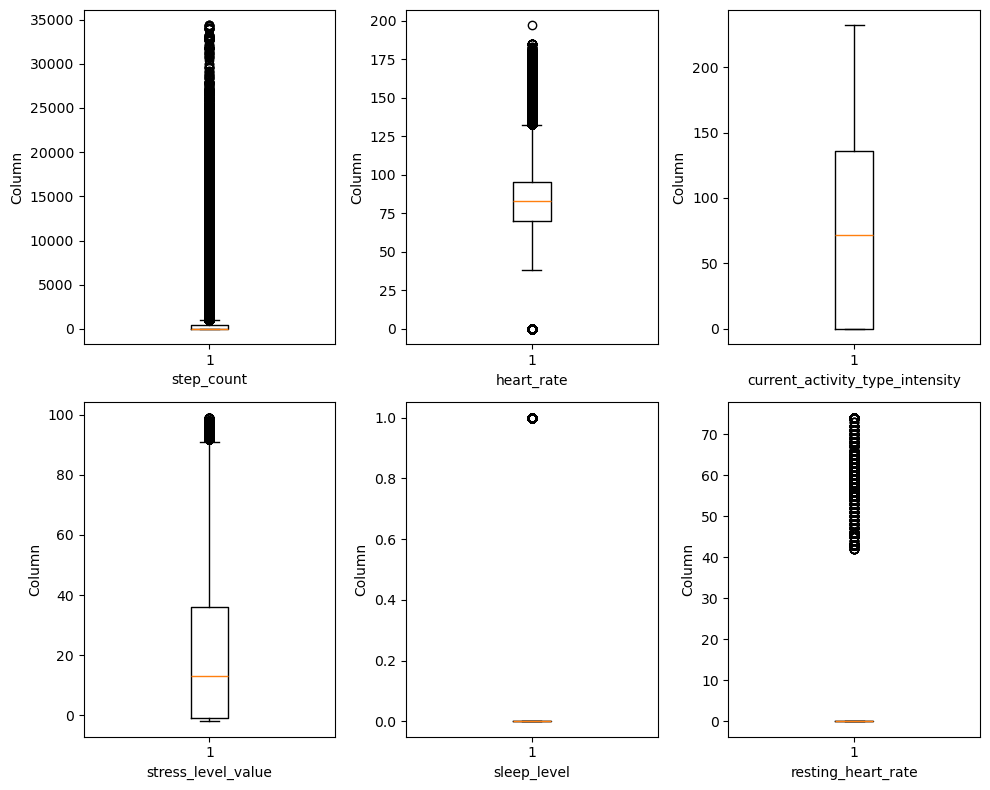

In [43]:
# box plot for each numeric column
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

for i in range(len(numericCols)):
    col = numericCols[i]
    axs[i//3, i%3].boxplot(sleep_df[col]);
    axs[i//3, i%3].set_xlabel(col)
    axs[i//3, i%3].set_ylabel("Column")
    
plt.tight_layout()
plt.show()

In [44]:
# remove step count because who is taking 10000 steps while they're asleep? And what does that have to do with anything?
sleep_df.drop("step_count", axis=1, inplace=True)
numericCols.remove("step_count")

# drop heartrate of 0 because we are not dead
sleep_df = sleep_df[ sleep_df["heart_rate"] > 0 ]

sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304658 entries, 1 to 321757
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   sleep_ts                         304658 non-null  datetime64[ns]
 1   heart_rate                       304658 non-null  int64         
 2   current_activity_type_intensity  304658 non-null  int64         
 3   stress_level_value               304658 non-null  int64         
 4   sleep_level                      304658 non-null  int64         
 5   resting_heart_rate               304658 non-null  int64         
 6   subjectID                        304658 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.6 MB


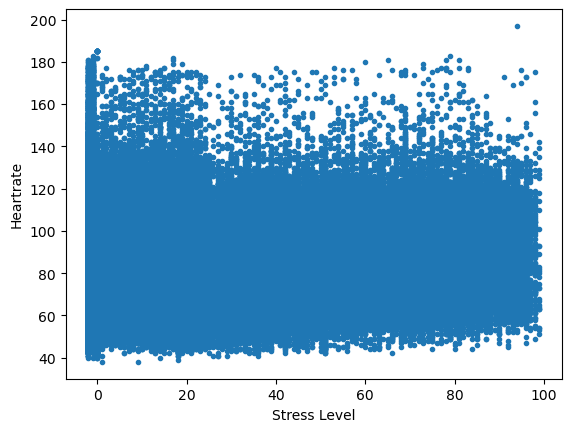

In [45]:
# plot heartrate vs stress
plt.plot(sleep_df["stress_level_value"], sleep_df["heart_rate"], '.')
plt.xlabel("Stress Level")
plt.ylabel("Heartrate")
plt.show()

In [46]:
# get average heartrate by sleep level
sleep_df.groupby("sleep_level")["heart_rate"].mean()

sleep_level
0    84.985977
1    84.113469
Name: heart_rate, dtype: float64

In [47]:
# get average intensity by sleep level
sleep_df.groupby("sleep_level")["current_activity_type_intensity"].mean()

sleep_level
0     72.602291
1    106.951631
Name: current_activity_type_intensity, dtype: float64

In [48]:
# no categorical columns to encode, so standardize numeric columns
scalerStd = StandardScaler()
sleep_transformed = sleep_df.copy()
sleep_transformed[numericCols] = scalerStd.fit_transform(sleep_df[numericCols])

sleep_transformed = pd.DataFrame(sleep_transformed)

sleep_transformed.head()

,sleep_ts,heart_rate,current_activity_type_intensity,stress_level_value,sleep_level,resting_heart_rate,subjectID
1,2023-10-06 00:05:00,-0.106437,-1.045543,0.249290,-0.404264,-0.098341,2301
2,2023-10-06 00:10:00,-0.163557,-1.166020,0.397706,-0.404264,-0.098341,2301
3,2023-10-06 00:15:00,-0.106437,-1.166020,0.323498,-0.404264,-0.098341,2301
4,2023-10-06 00:20:00,-0.163557,-1.166020,0.323498,-0.404264,-0.098341,2301
5,2023-10-06 00:25:00,0.122041,-1.166020,-0.863832,-0.404264,-0.098341,2301
